## **Task 4: Visualize Data (Part 4)**
<hr/>

### **0. Import & Install libraries**

In [2]:
# Install libraries

In [3]:
# Import libraries
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import pandas as pd
from itertools import combinations
## Visualizing
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')

<hr/>

### **1. Kết nối và lấy data từ Local MongoDB**

In [4]:
client = MongoClient('mongodb://localhost:27017/')
db = client['T2_PreprocessedData']

In [5]:
# Users Infor
collection = db['Users_Infor']
cursor = collection.find()
data_list = list(cursor)

ui_df = pd.DataFrame(data_list, index = None)
ui_df = ui_df.drop('_id', axis=1, errors='ignore')
ui_df.head()

,user_id,user_name,member_since
0,ur0028288,merrywood,2000-11-01
1,ur0032412,Buckywunder,2000-01-01
2,ur0033913,Sylviastel,2001-01-01
3,ur0035229,Spleen,2001-01-01
4,ur0035641,pk-2,2001-02-01


In [6]:
# Movies Infor
collection = db['Movies_Infor']
cursor = collection.find()
data_list = list(cursor)

mi_df = pd.DataFrame(data_list, index = None)
mi_df = mi_df.drop('_id', axis=1, errors='ignore')
mi_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"['Comedy', 'Drama', 'Family']",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"['Adventure', 'Comedy', 'Drama', 'Romance', 'W...",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
2,tt0017136,Metropolis,In a futuristic city sharply divided between t...,9180,"['Drama', 'Sci-Fi']",1927-03-13,United States,"['Brigitte Helm', 'Alfred Abel', 'Gustav Fröhl...",['Fritz Lang'],184863.0,8.3,6,6
3,tt0017925,The General,After being rejected by the Confederate milita...,4680,"['Action', 'Adventure', 'Comedy', 'Drama', 'War']",1927-01-02,United States,"['Buster Keaton', 'Marion Mack', 'Glen Cavender']","['Clyde Bruckman', 'Buster Keaton']",97815.0,8.1,2,1
4,tt0019109,Lonesome,Two lonely people in the big city meet and enj...,4140,"['Comedy', 'Drama', 'Romance']",1928-11-22,Hungary,"['Barbara Kent', 'Glenn Tryon', 'Fay Holderness']",['Pál Fejös'],2586.0,7.8,1,0


In [7]:
# Ratings
collection = db['Ratings']
cursor = collection.find()
data_list = list(cursor)

r_df = pd.DataFrame(data_list, index = None)
r_df = r_df.drop('_id', axis=1, errors='ignore')
r_df.head()

,user_id,movie_id,user_rating
0,ur0028288,tt2392830,8.0
1,ur0028288,tt4635282,6.0
2,ur0028288,tt0470752,9.0
3,ur0028288,tt3681794,6.0
4,ur0028288,tt0063442,9.0


<hr/>

### **2. Tiền xử lý dữ liệu**

In [8]:
mi_df['genre'] = mi_df['genre'].apply(eval)

<hr/>

### **3. Trực quan hóa dữ liệu (Thống kê)**

In [9]:
mi_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
2,tt0017136,Metropolis,In a futuristic city sharply divided between t...,9180,"[Drama, Sci-Fi]",1927-03-13,United States,"['Brigitte Helm', 'Alfred Abel', 'Gustav Fröhl...",['Fritz Lang'],184863.0,8.3,6,6
3,tt0017925,The General,After being rejected by the Confederate milita...,4680,"[Action, Adventure, Comedy, Drama, War]",1927-01-02,United States,"['Buster Keaton', 'Marion Mack', 'Glen Cavender']","['Clyde Bruckman', 'Buster Keaton']",97815.0,8.1,2,1
4,tt0019109,Lonesome,Two lonely people in the big city meet and enj...,4140,"[Comedy, Drama, Romance]",1928-11-22,Hungary,"['Barbara Kent', 'Glenn Tryon', 'Fay Holderness']",['Pál Fejös'],2586.0,7.8,1,0


#### **3.1. Thống kê: Số lượng phim theo từng thể loại:**

##### **1 thể loại:**  

In [10]:
nf_genre1_df = mi_df.copy()

In [11]:
nf_genre1_df = nf_genre1_df.explode('genre')
nf_genre1_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Comedy,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Drama,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Family,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Adventure,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Comedy,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3


In [12]:
genre1_nfilm = nf_genre1_df['genre'].value_counts()
genre1_nfilm_df = pd.DataFrame({'genre': genre1_nfilm.index, 'num_film': genre1_nfilm.values})
genre1_nfilm_df

,genre,num_film
0,Drama,2313
1,Thriller,1281
2,Comedy,1240
3,Action,985
4,Adventure,843
5,Crime,793
6,Romance,685
7,Mystery,678
8,Sci-Fi,646
9,Horror,613


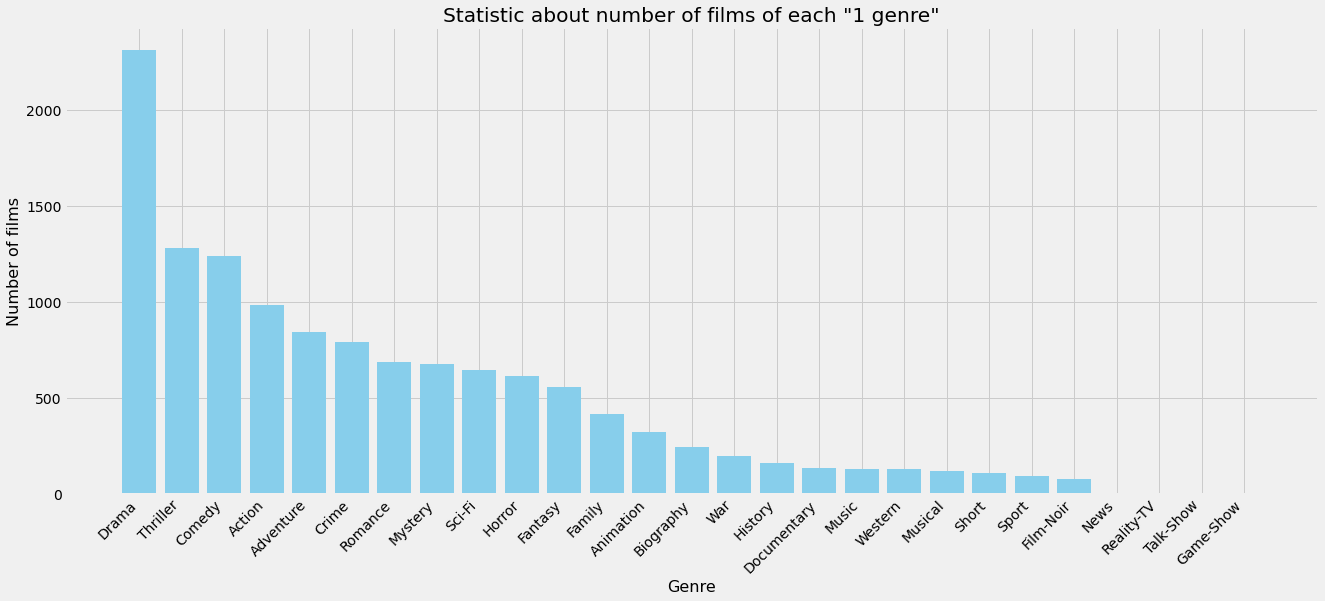

In [13]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(genre1_nfilm_df['genre'], genre1_nfilm_df['num_film'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre',fontsize = 16)
plt.ylabel('Number of films',fontsize = 16)
plt.title('Statistic about number of films of each "1 genre"')
plt.show()

##### **2 thể loại (Top 10):**

In [14]:
nf_genre2_df = mi_df.copy()

In [15]:
# Create combinations of two elements from the list
nf_genre2_df['2genres'] = nf_genre2_df['genre'].apply(lambda x: list(combinations(x, 2)))

nf_genre2_df = nf_genre2_df.explode('2genres')
nf_genre2_df = nf_genre2_df['2genres'].value_counts()[:10]
nf_genre2_df = pd.DataFrame({'2genres': nf_genre2_df.index, 'num_film': nf_genre2_df.values})
nf_genre2_df['2genres'] = nf_genre2_df['2genres'].astype(str)
nf_genre2_df

,2genres,num_film
0,"('Drama', 'Thriller')",695
1,"('Crime', 'Drama')",542
2,"('Drama', 'Romance')",505
3,"('Comedy', 'Drama')",492
4,"('Crime', 'Thriller')",480
5,"('Action', 'Thriller')",476
6,"('Action', 'Adventure')",471
7,"('Mystery', 'Thriller')",436
8,"('Drama', 'Mystery')",407
9,"('Action', 'Drama')",365


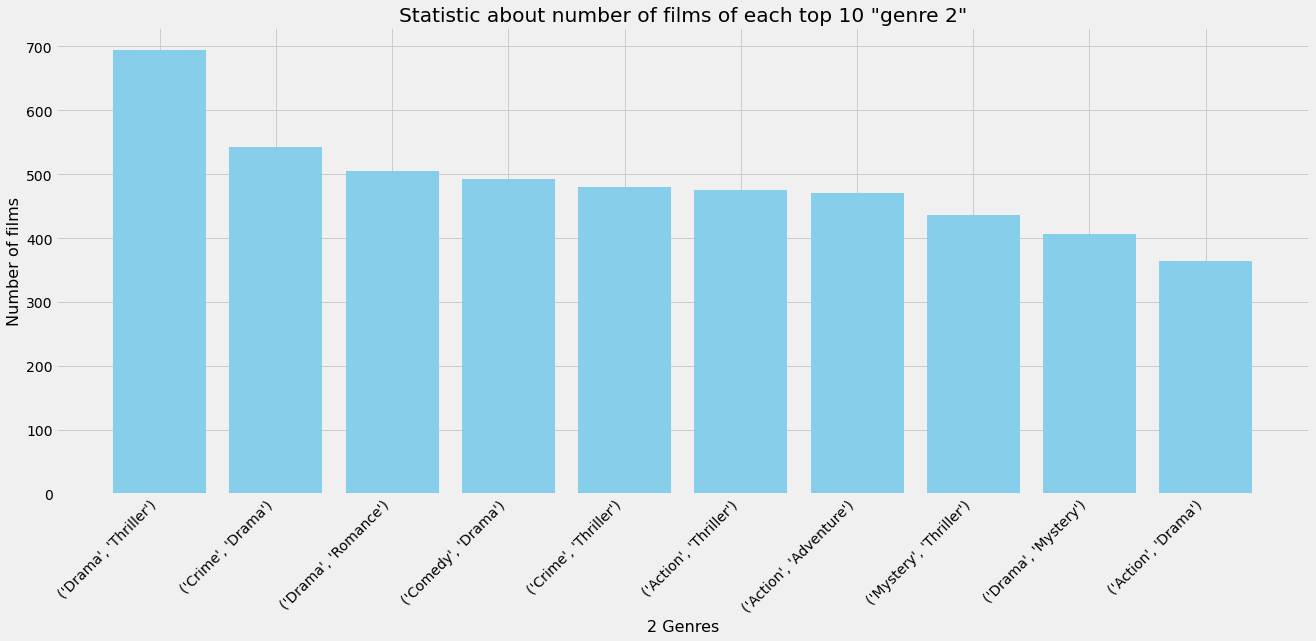

In [16]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(nf_genre2_df['2genres'], nf_genre2_df['num_film'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('2 Genres',fontsize = 16)
plt.ylabel('Number of films',fontsize = 16)
plt.title('Statistic about number of films of each top 10 "genre 2"')
plt.show()

##### **3 thể loại (Top 10):**

In [17]:
nf_genre3_df = mi_df.copy()

In [18]:
# Create combinations of two elements from the list
nf_genre3_df['3genres'] = nf_genre3_df['genre'].apply(lambda x: list(combinations(x, 3)))

nf_genre3_df = nf_genre3_df.explode('3genres')
nf_genre3_df = nf_genre3_df['3genres'].value_counts()[:10]
nf_genre3_df = pd.DataFrame({'3genres': nf_genre3_df.index, 'num_film': nf_genre3_df.values})
nf_genre3_df['3genres'] = nf_genre3_df['3genres'].astype(str)
nf_genre3_df

,3genres,num_film
0,"('Crime', 'Drama', 'Thriller')",326
1,"('Drama', 'Mystery', 'Thriller')",262
2,"('Action', 'Adventure', 'Sci-Fi')",243
3,"('Action', 'Crime', 'Thriller')",191
4,"('Action', 'Drama', 'Thriller')",182
5,"('Adventure', 'Comedy', 'Family')",176
6,"('Adventure', 'Family', 'Fantasy')",169
7,"('Comedy', 'Drama', 'Romance')",167
8,"('Action', 'Adventure', 'Fantasy')",163
9,"('Animation', 'Adventure', 'Family')",163


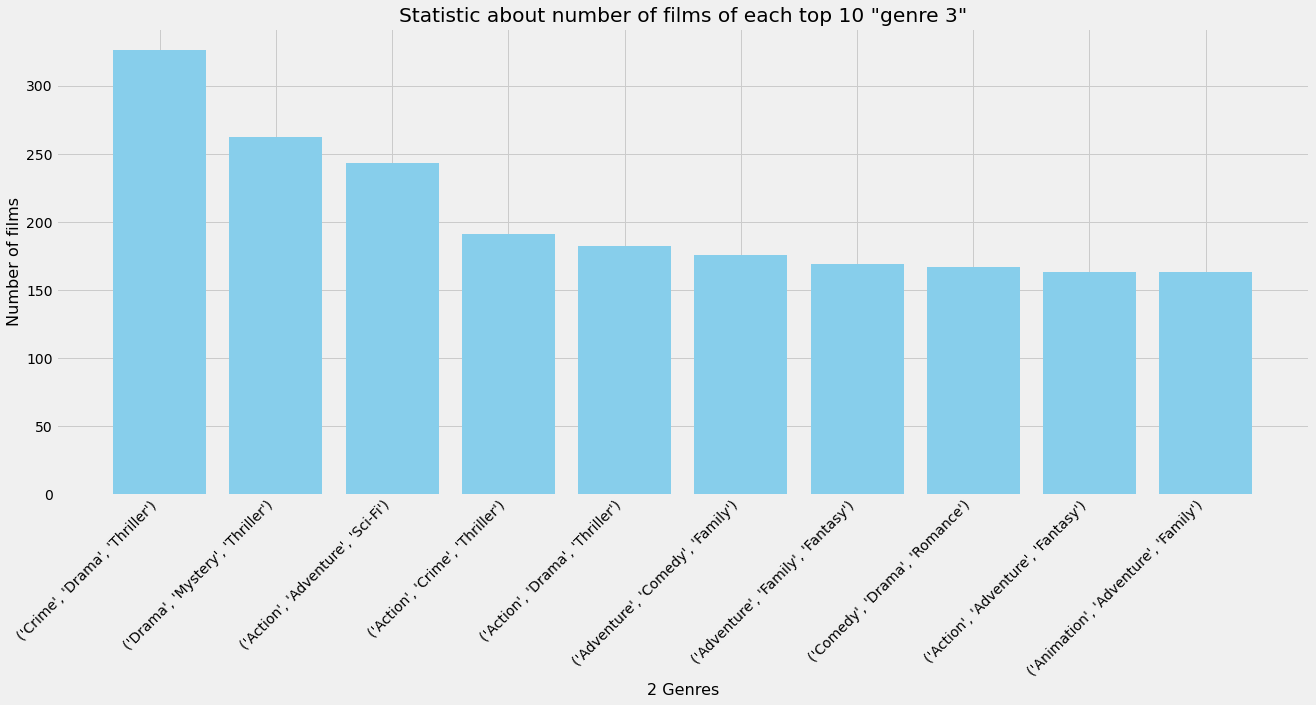

In [19]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(nf_genre3_df['3genres'], nf_genre3_df['num_film'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('2 Genres',fontsize = 16)
plt.ylabel('Number of films',fontsize = 16)
plt.title('Statistic about number of films of each top 10 "genre 3"')
plt.show()

##### **Nội dung:**

+ Trả lời câu hỏi này sẽ giúp cho chúng ta biết thể loại nào hiện tại đang là hot trending, từ đó các nhà làm phim có thể biết mà thực hiện thể loại phim nào cho tốt hay cả người dùng nên lựa chọn thể loại phim nào cho phù hợp với xu hướng hiện tại 
+ Ý tưởng: Thực hiện explode đối với cột genre với filter lần lượt là 1, 2, 3 thể loại, sau đó sử dụng value_count() để lấy ra top thể loại (1,2,3 thể loại) có số lượng phim cao nhất. 
+ Đồ thị sử dụng: Sử dụng bar chart để biểu diễn số lượng phim khác nhau giữa các top thể loại 1 cách tốt nhất


##### **Nhận xét:**

+ Nhìn vào biểu đồ 1 thể loại, ta có thể thấy Drama, Thriller, Comedy, Action, Adventure, Crime là thể loại 1 có nhiều số lượng phim nhất trong các thể loại.
+ Nhìn vào biểu đồ 2 thể loại, ta cũng có thể thấy các top đầu như (Drama, Thriller), (Crime, Drama), (Action, Adventure), các thể loại chỉ đi kèm cùng nhau chứ nó đều nằm trong top thể loại 1.
+ Nhìn vào biểu đồ 3 thể loại, ta sẽ thấy các thể loại top đầu cũng có kết hợp với nhau như (Crime, Drama, Thriller), (Action, Crime, Thriller), nhưng vẫn có những thể loại top đầu kết hợp kết hợp với thể loại top trung khác như: (Action, Adventure, Sci-Fi) , (Drama, Mystery, Thriller)

=> Từ đó, ta đưa ra lời khuyên cho các nhà sản xuất phim là nên sản xuất những bộ phim có genre 1-2 nằm trong top đầu như (Drama, Thriller), (Crime, Drama), (Action, Adventure), khi xác định được thì nên xem các thể loại nào phù hợp để đan xen thêm vào trong genre 1-2 đó chứ không nên lạm dụng quá nhiều thể loại top vô chung với nhau.

#### **3.2. Thống kê: Số lượng giải thưởng + đề cử theo từng thể loại:**

##### **1 thể loại:**  

In [20]:
tan_genre1_df = mi_df.copy()

In [21]:
tan_genre1_df = tan_genre1_df.explode('genre')
tan_genre1_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Comedy,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Drama,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Family,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Adventure,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Comedy,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3


In [22]:
tan_genre1_df['totalAN'] = tan_genre1_df['totalAwards'] + tan_genre1_df['totalNominations']

In [23]:
tan_genre1 = tan_genre1_df.groupby('genre')[['totalAN', 'totalAwards','totalNominations']].sum().sort_values(by='totalAN', ascending=False)[:10]
tan_genre1

,totalAN,totalAwards,totalNominations
genre,,,
Drama,95145,32130,63015
Thriller,34431,10862,23569
Comedy,32995,10484,22511
Adventure,30607,9967,20640
Action,29250,9059,20191
Romance,23542,7874,15668
Sci-Fi,23022,6816,16206
Crime,21791,6742,15049
Fantasy,20336,6662,13674


In [49]:
fig = go.Figure(data=[
    go.Bar(name='totalNominations', x=tan_genre1.index, y=tan_genre1['totalNominations']),
    go.Bar(name='totalAwards', x=tan_genre1.index, y=tan_genre1['totalAwards'])
   
])

fig.update_layout(barmode='stack', title='Top 10 "Genre 1" have the highest total Nominations and Awards')

# Hiển thị biểu đồ
fig.show()

##### **2 thể loại:**  

In [25]:
tan_genre2_df = mi_df.copy()

In [26]:
tan_genre2_df['2genres'] = tan_genre2_df['genre'].apply(lambda x: list(combinations(x, 2)))
tan_genre2_df = tan_genre2_df.explode('2genres')
tan_genre2_df['2genres'] = tan_genre2_df['2genres'].astype(str)
tan_genre2_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations,2genres
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Comedy', 'Drama')"
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Comedy', 'Family')"
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Drama', 'Family')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Drama')"


In [27]:
tan_genre2_df['totalAN'] = tan_genre2_df['totalAwards'] + tan_genre2_df['totalNominations']

In [28]:
tan_genre2 = tan_genre2_df.groupby('2genres')[['totalAN', 'totalAwards','totalNominations']].sum().sort_values(by='totalAN', ascending=False)[:10]
tan_genre2

,totalAN,totalAwards,totalNominations
2genres,,,
"('Drama', 'Thriller')",25936,8180,17756
"('Drama', 'Romance')",21450,7150,14300
"('Comedy', 'Drama')",19776,6392,13384
"('Action', 'Adventure')",18504,5994,12510
"('Crime', 'Drama')",18407,5770,12637
"('Biography', 'Drama')",15104,4931,10173
"('Adventure', 'Fantasy')",14450,4860,9590
"('Adventure', 'Sci-Fi')",13832,4350,9482
"('Action', 'Drama')",13760,4376,9384


In [29]:
fig = go.Figure(data=[
    go.Bar(name='totalNominations', x=tan_genre2.index, y=tan_genre2['totalNominations']),
    go.Bar(name='totalAwards', x=tan_genre2.index, y=tan_genre2['totalAwards'])
   
])

fig.update_layout(barmode='stack', title='Top 10 "Genre 2" have the highest total Nominations and Awards')

# Hiển thị biểu đồ
fig.show()

##### **3 thể loại:**  

In [30]:
tan_genre3_df = mi_df.copy()

In [31]:
tan_genre3_df['3genres'] = tan_genre3_df['genre'].apply(lambda x: list(combinations(x, 3)))
tan_genre3_df = tan_genre3_df.explode('3genres')
tan_genre3_df['3genres'] = tan_genre3_df['3genres'].astype(str)
tan_genre3_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations,3genres
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Comedy', 'Drama', 'Family')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy', 'Drama')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy', 'Romance')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy', 'Western')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Drama', 'Romance')"


In [32]:
tan_genre3_df['totalAN'] = tan_genre3_df['totalAwards'] + tan_genre3_df['totalNominations']

In [33]:
tan_genre3 = tan_genre3_df.groupby('3genres')[['totalAN', 'totalAwards','totalNominations']].sum().sort_values(by='totalAN', ascending=False)[1:11]
tan_genre3

,totalAN,totalAwards,totalNominations
3genres,,,
"('Action', 'Adventure', 'Sci-Fi')",10979,3498,7481
"('Crime', 'Drama', 'Thriller')",10197,3232,6965
"('Drama', 'Mystery', 'Thriller')",9640,2790,6850
"('Action', 'Adventure', 'Fantasy')",8103,2895,5208
"('Action', 'Adventure', 'Drama')",6735,2276,4459
"('Comedy', 'Drama', 'Romance')",6416,2147,4269
"('Adventure', 'Drama', 'Fantasy')",6316,2157,4159
"('Adventure', 'Family', 'Fantasy')",6239,2000,4239
"('Animation', 'Adventure', 'Family')",5909,2137,3772


In [34]:
fig = go.Figure(data=[
    go.Bar(name='totalNominations', x=tan_genre3.index, y=tan_genre3['totalNominations']),
    go.Bar(name='totalAwards', x=tan_genre3.index, y=tan_genre3['totalAwards'])
   
])

fig.update_layout(barmode='stack', title='Top 10 "Genre 3" have the highest total Nominations and Awards')

# Hiển thị biểu đồ
fig.show()

##### **Nội dung:**  

+ Trả lời câu hỏi này sẽ giúp cho chúng ta biết thể loại nào hiện tại đang là thể loại phim mang tới nhiều giải thưởng nhất, từ đó có thể các nhà sản xuất phim nếu muốn hướng giải thưởng thì có thể nhắm tới các thể loại phim này.
+ Ý tưởng: Thực hiện tính tổng số lượng giải thưởng với đề cử đối với dataframe có cột genre với filter lần lượt là 1, 2, 3 thể loại (Explode), sau đó sử dụng value_count() để lấy ra top thể loại (1,2,3 thể loại) có cả số lượng giải thưởng và đề cử cao nhất. 
+ Đồ thị sử dụng: Sử dụng stacked bar chart để biểu diễn số lượng giải thưởng, số lượng đề cử và cả tổng số lượng của cả hai giữa các top thể loại một cách tốt nhất


##### **Nhận xét:**  

+ Nhìn vào biểu đồ 1 thể loại, ta có thể thấy tương tự như top số lượng phim cho thể loại 1 thì Drama, Thriller, Comedy, Action, Adventure, Crime là thể loại 1 có nhiều giải thưởng và đề cử nhất trong các bộ phim
+ Nhìn vào biểu đồ 2-3 thể loại, thì ta thấy đã có sự phân bố khác mặc dù các thể loại 1 vẫn nhiều nhưng vẫn dựa vào sự kết hợp giữa các thể loại lại với nhau, cụ thể nếu ta không còn thấy Drama nằm top 1 của thể loại 3 nữa.
=> Từ đó, ta đưa ra lời khuyên cho các nhà sản xuất phim nếu muốn có giải thưởng hay đề cử thì nên sản xuất các thể loại top ở các biểu đồ trên nhưng cũng nên xem xét kĩ việc tích hợp các thể loại lại với nhau. 


<hr/>

### **4. Trực quan hóa dữ liệu (Hệ thống gợi ý)**

#### **4.1. Hệ thống gợi ý: Top n bộ phim theo thể loại**
##### *Filter: 1,2,3 thể loại*

##### **Nội dung:**

+ Trả lời câu hỏi này giúp ta gợi ý cho users những bộ phim theo thể loại hot nhất hiện nay. Cụ thể là có thể xây dựng trong Home page 1 mục là tìm phim theo thể loại.
+ Ý tưởng: Thực hiện sort và lấy ra top 10 thể loại có nhiều phim đạt rating cao nhất, vì một bộ phim có thể có một hoặc nhiều thể loại, vì vậy cần phải explode thuộc tính genre, sau đó sử dụng groupby theo từng thể loại, cuối cùng lọc ra top 10 và dùng barplot để trực quan kết quả. 
+ Đồ thị sử dụng: Sử dụng bar chart để biểu diễn rating giữa các phim trong thể loại cần xác định một cách tốt nhất
+ Mở rộng: Xây dựng một function giúp đưa vào thể loại và đưa ra kết quả top phim để phục vụ cho việc xây dựng hệ thống gợi ý chung cho mọi users ở giai đoạn sau.


##### **Visualize:**

In [52]:
genre_df = mi_df.copy()
genre_df['genre'] = genre_df['genre'].astype(str)

In [53]:
options = ['drama']
for opt in options: 
    mask = genre_df['genre'].str.lower().str.contains(opt.lower())
    genre_df = genre_df[mask].reset_index()

genre_df.head()

,index,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"['Comedy', 'Drama', 'Family']",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"['Adventure', 'Comedy', 'Drama', 'Romance', 'W...",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
2,2,tt0017136,Metropolis,In a futuristic city sharply divided between t...,9180,"['Drama', 'Sci-Fi']",1927-03-13,United States,"['Brigitte Helm', 'Alfred Abel', 'Gustav Fröhl...",['Fritz Lang'],184863.0,8.3,6,6
3,3,tt0017925,The General,After being rejected by the Confederate milita...,4680,"['Action', 'Adventure', 'Comedy', 'Drama', 'War']",1927-01-02,United States,"['Buster Keaton', 'Marion Mack', 'Glen Cavender']","['Clyde Bruckman', 'Buster Keaton']",97815.0,8.1,2,1
4,4,tt0019109,Lonesome,Two lonely people in the big city meet and enj...,4140,"['Comedy', 'Drama', 'Romance']",1928-11-22,Hungary,"['Barbara Kent', 'Glenn Tryon', 'Fay Holderness']",['Pál Fejös'],2586.0,7.8,1,0


In [54]:
genre_df = genre_df.sort_values(by='ratingStar',ascending=False)
genre_df = genre_df[['title', 'ratingStar']]
genre_df = genre_df[:10]
genre_df

,title,ratingStar
731,Red Dead Redemption II,9.7
889,Minecraft Epic,9.5
514,Breaking Bad,9.5
443,Persona 5 Royal,9.5
503,Band of Brothers,9.4
864,Silent Hill 2,9.4
211,The Shawshank Redemption,9.3
2065,Chernobyl,9.3
439,Biohazard 4,9.2
1195,The Chaos Class,9.2


In [38]:
# Plotting Matplotlib
# plt.figure(figsize=(20, 8))
# plt.bar(a_df['title'], a_df['ratingStar'], color='skyblue')
# plt.xticks(rotation=45, ha='right')
# plt.xlabel('Title',fontsize = 16)
# plt.ylabel('Rating Star',fontsize = 16)
# plt.title('Top 10 Drama Movies have the highest rating star')
# plt.show()

In [55]:
# Plotting Plotly
# Vẽ biểu đồ
fig = px.bar(genre_df, x='ratingStar', y='title', orientation='h', title='Top 10 film drama have the highest average rating star', color_discrete_sequence=['gold'])
fig.show()

##### **Function:**

In [40]:
def rs_genre(df, options):
    genre_df = df.copy()
    genre_df['genre'] = genre_df['genre'].astype(str)
    
    for opt in options: 
        mask = genre_df['genre'].str.lower().str.contains(opt.lower())
        genre_df = genre_df[mask].reset_index()

    genre_df = genre_df.sort_values(by='ratingStar',ascending=False)
    genre_df = genre_df[['movie_id', 'title', 'ratingStar']]
    genre_df = genre_df[:10]

    # fig = px.bar(genre_df, x='ratingStar', y='title', orientation='h', title='Top 10 film drama have the highest average rating star', color_discrete_sequence=['gold'])
    # fig.show()  

    return genre_df[['movie_id', 'title', 'ratingStar']] 

In [41]:
# Test
df = mi_df.copy()
rs_genre(df, ['comedy', 'drama'])

,movie_id,title,ratingStar
65,tt10468596,Persona 5 Royal,9.5
167,tt10680606,Minecraft Epic,9.5
70,tt3944082,Persona 5,9.2
238,tt0252487,The Chaos Class,9.2
121,tt9357776,Wilford 'Motherloving' Warfstache,9.1
78,tt0388629,One Piece,9.0
66,tt10986410,Ted Lasso,8.8
401,tt3718778,Over the Garden Wall,8.8
393,tt0193676,Freaks and Geeks,8.8
343,tt5555260,This Is Us,8.7


#### **4.2. Hệ thống gợi ý: Advanced search**

##### **Nội dung:**

+ Trả lời câu hỏi này giúp ta gợi ý cho users những bộ phim theo bất kỳ nội dung nào mà user muốn tìm. Cụ thể là có thể xây dựng trong Home page 1 mục là tìm phim theo advanced search. 
+ Ý tưởng: Thực hiện sort và lấy ra top 10 phim có nội dung mà user muốn có đạt rating cao nhất và dùng barplot để trực quan kết quả. 
+ Đồ thị sử dụng: Sử dụng bar chart để biểu diễn rating giữa các phim trong nội dung mà user muốn một cách tốt nhất
+ Mở rộng: Xây dựng một function giúp đưa vào bất kỳ nội dung gì và đưa ra kết quả top phim để phục vụ cho việc xây dựng hệ thống gợi ý chung cho mọi users ở giai đoạn sau

##### **Visualize:**

In [42]:
as_df = mi_df.copy()

In [43]:
as_df.columns

Index(['movie_id', 'title', 'introduction', 'runtimeSeconds', 'genre',
       'releaseDate', 'releaseLocation', 'actors', 'directors', 'totalRatings',
       'ratingStar', 'totalAwards', 'totalNominations'],
      dtype='object')

In [44]:
options = {
    'title': "o",
    'genre': ["drama", "comedy"],
    'actors': "", 
    'directors': "",
    'releaseLocation': "u", 
    'releaseDate': '06-1920',
    'ratingStar': 9
}

In [45]:
as_df = mi_df.copy()
as_df['genre'] = as_df['genre'].astype(str)
as_df['actors'] = as_df['actors'].astype(str)
as_df['directors'] = as_df['directors'].astype(str)

for idx in options.keys():
    ### Filter:
    if (idx == 'title'):
        if options[idx] != "":
            mask = as_df['title'].str.lower().str.contains(options['title'].lower())
            as_df = as_df[mask]

    if (idx == 'genre'):
        if options[idx]: 
            for opt in options[idx]:
                mask = as_df['genre'].str.lower().str.contains(opt.lower())
                as_df = as_df[mask]

    if (idx == 'actors'):
        if options[idx] != "":
            mask = as_df['actors'].str.lower().str.contains(options['actors'].lower())
            as_df = as_df[mask]
    
    if (idx == 'directors'):
        if options[idx] != "":
            mask = as_df['directors'].str.lower().str.contains(options['directors'].lower())
            as_df = as_df[mask]

    if (idx == 'releaseLocation'):
        if options[idx] != "":
            mask = as_df['releaseLocation'].str.lower().str.contains(options['releaseLocation'].lower())
            as_df = as_df[mask]

    ### Sort By:
    if (idx == 'releaseDate'):
            if options[idx] != "": 
                mask = as_df['releaseDate'] >= options[idx]
                as_df = as_df[mask]
                as_df = as_df.sort_values(by='releaseDate',ascending=False)
                
    if (idx == 'ratingStar'):
            if options[idx] != "": 
                mask = as_df['ratingStar'] >= options[idx]
                as_df = as_df[mask]
                as_df = as_df.sort_values(by='ratingStar',ascending=False)
    



In [46]:
# Plotting Plotly
# Vẽ biểu đồ
fig = px.bar(as_df, x='ratingStar', y='title', orientation='h', title='Top 10 film have the highest average rating star', color_discrete_sequence=['gold'])
# Tạo chuỗi chú thích từ dictionary
annotation_text = "<b>Thông tin phim:</b><br>"
for key, value in options.items():
    annotation_text += f"<b>{key.capitalize()}:</b> {value}<br>"

# Thiết lập chú thích
fig.update_layout(
    annotations=[
        dict(
            x=0.5,
            y=0.5,
            xref="paper",
            yref="paper",
            text=annotation_text,
            showarrow=False
        )
    ]
)
fig.show()

##### **Function:**

In [47]:
def rs_asearch(df, options):
    as_df = df.copy()
    as_df['genre'] = as_df['genre'].astype(str)
    as_df['actors'] = as_df['actors'].astype(str)
    as_df['directors'] = as_df['directors'].astype(str)
    
    for idx in options.keys():
        ### Filter:
        if (idx == 'title'):
            if options[idx] != "":
                mask = as_df['title'].str.lower().str.contains(options['title'].lower())
                as_df = as_df[mask]

        if (idx == 'genre'):
            if options[idx]: 
                for opt in options[idx]:
                    mask = as_df['genre'].str.lower().str.contains(opt.lower())
                    as_df = as_df[mask]

        if (idx == 'actors'):
            if options[idx] != "":
                mask = as_df['actors'].str.lower().str.contains(options['actors'].lower())
                as_df = as_df[mask]
        
        if (idx == 'directors'):
            if options[idx] != "":
                mask = as_df['directors'].str.lower().str.contains(options['directors'].lower())
                as_df = as_df[mask]

        if (idx == 'releaseLocation'):
            if options[idx] != "":
                mask = as_df['releaseLocation'].str.lower().str.contains(options['releaseLocation'].lower())
                as_df = as_df[mask]

        ### Sort By:
        if (idx == 'releaseDate'):
                if options[idx] != "": 
                    mask = as_df['releaseDate'] >= options[idx]
                    as_df = as_df[mask]
                    as_df = as_df.sort_values(by='releaseDate',ascending=False)
                    
        if (idx == 'ratingStar'):
                if options[idx] != "": 
                    mask = as_df['ratingStar'] >= options[idx]
                    as_df = as_df[mask]
                    as_df = as_df.sort_values(by='ratingStar',ascending=False)

    return as_df

In [48]:
df = mi_df.copy()
options = {
    'title': "",
    'genre': ["drama", "comedy"],
    'actors': "", 
    'directors': "",
    'releaseLocation': "", 
    'releaseDate': '06-2010',
    'ratingStar': 8
}
rs_asearch(df, options)

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
678,tt10468596,Persona 5 Royal,A group of high school students create a vigil...,0,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",2020-03-31,United States,"['Jun Fukuyama', 'Ikue Ôtani', 'Mamoru Miyano']",['Daiki Itô'],2266.0,9.5,0,1
1653,tt10680606,Minecraft Epic,Pewdiepie has epic adventures in Minecraft. Wi...,0,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",2019-06-21,United Kingdom,"['Felix Kjellberg', 'Joergen', 'Water Sheep']",[],4009.0,9.5,0,0
706,tt3944082,Persona 5,A group of high school students create a vigil...,0,"['Action', 'Adventure', 'Comedy', 'Drama', 'Fa...",2017-04-04,United States,"['Jun Fukuyama', 'Mamoru Miyano', 'Nana Mizuki']",['Katsura Hashino'],3343.0,9.2,7,11
1262,tt9357776,Wilford 'Motherloving' Warfstache,After the events of Who Killed Markiplier? (20...,1140,"['Short', 'Comedy', 'Drama']",2018-08-05,United States,"['Mark Fischbach', 'Mick Lauer', 'Lucy Marie S...",['Mark Fischbach'],216.0,9.1,0,0
680,tt10986410,Ted Lasso,American college football coach Ted Lasso head...,1800,"['Comedy', 'Drama', 'Sport']",2020-08-14,United States,"['Jason Sudeikis', 'Hannah Waddingham', 'Jerem...",[],344576.0,8.8,86,236
3559,tt3718778,Over the Garden Wall,Two brothers find themselves lost in a mysteri...,660,"['Animation', 'Short', 'Adventure', 'Comedy', ...",2014-11-03,United States,"['Elijah Wood', 'Collin Dean', 'Melanie Lynskey']",[],70338.0,8.8,4,9
2379,tt1190634,The Boys,A group of vigilantes set out to take down cor...,3600,"['Action', 'Comedy', 'Crime', 'Drama', 'Sci-Fi']",2019-07-26,United States,"['Karl Urban', 'Jack Quaid', 'Antony Starr']",[],647028.0,8.7,21,82
3202,tt5555260,This Is Us,A heartwarming and emotional story about a uni...,2700,"['Comedy', 'Drama', 'Romance']",2016-09-20,United States,"['Milo Ventimiglia', 'Mandy Moore', 'Sterling ...",[],159005.0,8.7,67,293
4070,tt2396224,It's Such a Beautiful Day,Bill struggles to put together his shattered p...,3720,"['Animation', 'Comedy', 'Drama', 'Fantasy', 'H...",2016-05-21,Japan,"['Sara Cushman', 'Don Hertzfeldt']",['Don Hertzfeldt'],117.0,8.6,0,2
1987,tt4288182,Atlanta,"Earn and his cousin, Alfred, try to make their...",1800,"['Comedy', 'Drama', 'Music']",2016-09-06,United States,"['Donald Glover', 'Brian Tyree Henry', 'LaKeit...",[],87753.0,8.6,60,148
